In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BMtrain.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#findin unique values
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#seperating classification data
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# removing ids
cat_col.remove('Item_Identifier')
# cat_col.remove('Outlet_Identifier')

In [ ]:
# counting value of each classfication attributes 
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# checking for values to be combined and labelencode


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


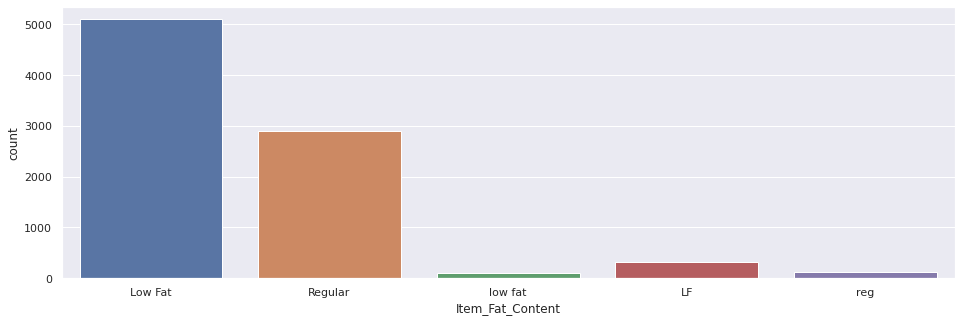

In [ ]:
sns.countplot(df["Item_Fat_Content"])

In [ ]:
df = df.replace(['Low Fat','low fat','LF'], 0)

In [ ]:
df = df.replace(['Regular','reg'], 1)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


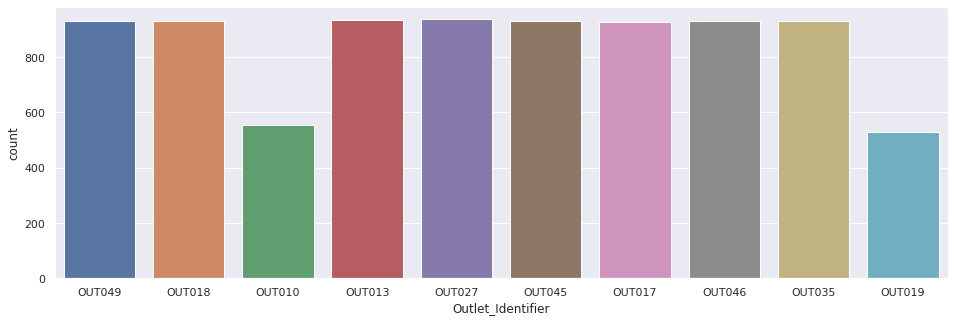

In [ ]:
sns.countplot(df["Outlet_Identifier"])

In [ ]:
outlet = df['Outlet_Identifier'].value_counts()
outlet.index

Index(['OUT027', 'OUT013', 'OUT049', 'OUT035', 'OUT046', 'OUT045', 'OUT018',
       'OUT017', 'OUT010', 'OUT019'],
      dtype='object')

In [ ]:
outlet.shape

(10,)

In [ ]:
df = df.replace(outlet.index, [0,1,2,3,4,5,6,7,8,9])

In [ ]:
value = df['Item_Type'].value_counts()
value.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

In [ ]:
df['Item_Type'].value_counts().shape

(16,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


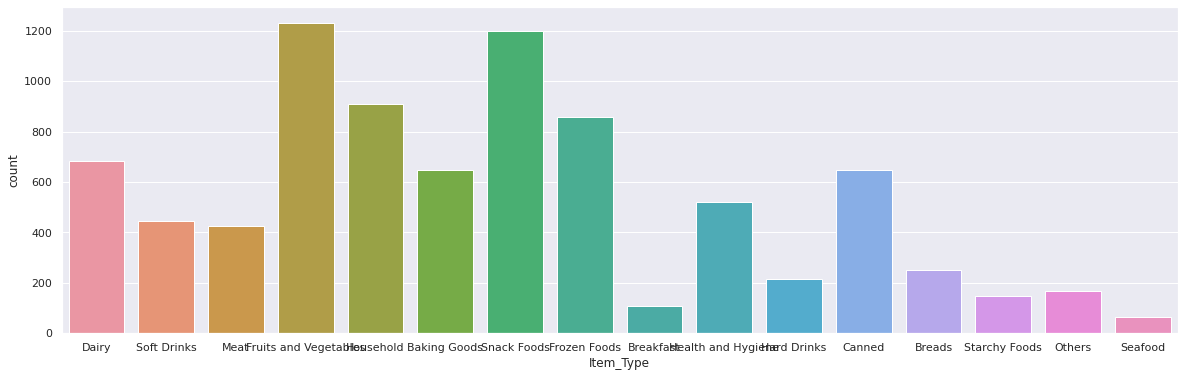

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(df["Item_Type"])

Seperating food and drinks and non consumable to 0,2&1

Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'

In [ ]:
df = df.replace(value.index, [0,0,1,0,2,0,0,1,2,0,0,2,1,0,0,0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


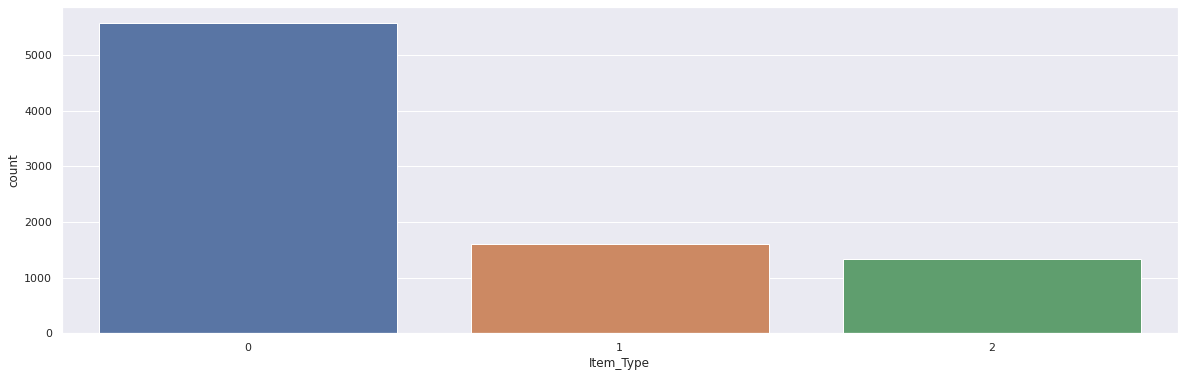

In [ ]:
sns.countplot(df["Item_Type"])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,2,249.8092,2,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,2,48.2692,6,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,2,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,8,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


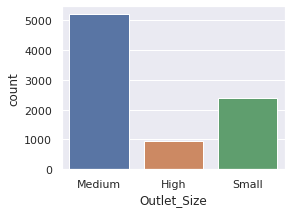

In [ ]:
sns.set(rc={'figure.figsize':(4,3)})
sns.countplot(df["Outlet_Size"])

In [ ]:
df = df.replace(['Medium','High','Small'],[0,1,2])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,2,249.8092,2,1999,0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,2,48.2692,6,2009,0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,2,1999,0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,8,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,1,1987,1,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


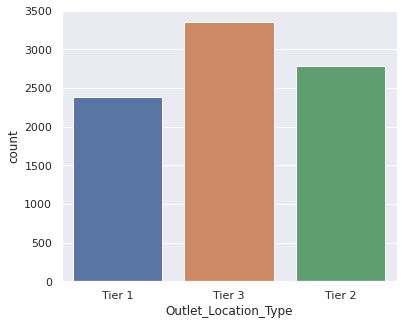

In [ ]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(df["Outlet_Location_Type"])

In [ ]:
df = df.replace(['Tier 1','Tier 2','Tier 3'],[0,1,2])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,2,249.8092,2,1999,0,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,2,48.2692,6,2009,0,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,2,1999,0,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,8,1998,0,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,1,1987,1,2,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


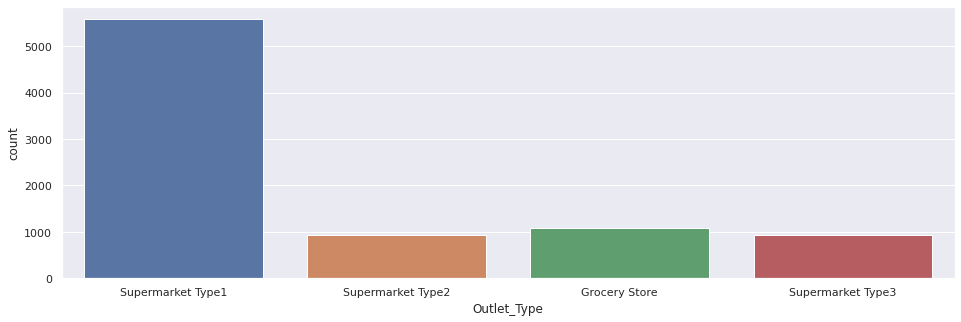

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
sns.countplot(df["Outlet_Type"])

In [ ]:
df = df.replace(['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'],[0,1,2,3])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,2,249.8092,2,1999,0,0,0,3735.1380
1,DRC01,5.92,1,0.019278,2,48.2692,6,2009,0,2,1,443.4228
2,FDN15,17.50,0,0.016760,0,141.6180,2,1999,0,0,0,2097.2700
3,FDX07,19.20,1,0.000000,0,182.0950,8,1998,0,2,3,732.3800
4,NCD19,8.93,0,0.000000,1,53.8614,1,1987,1,2,0,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


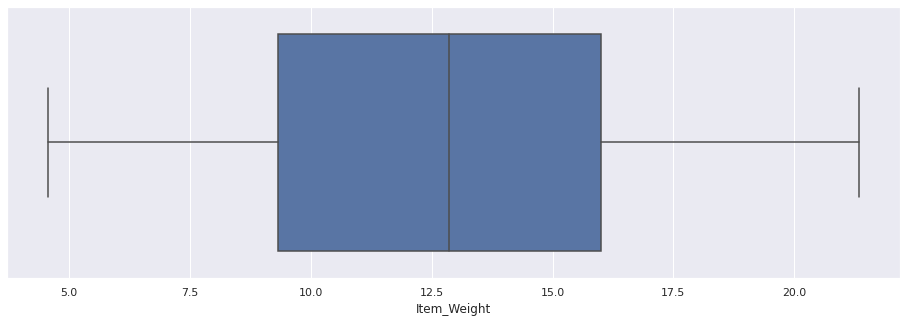

In [ ]:
sns.boxplot(df['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


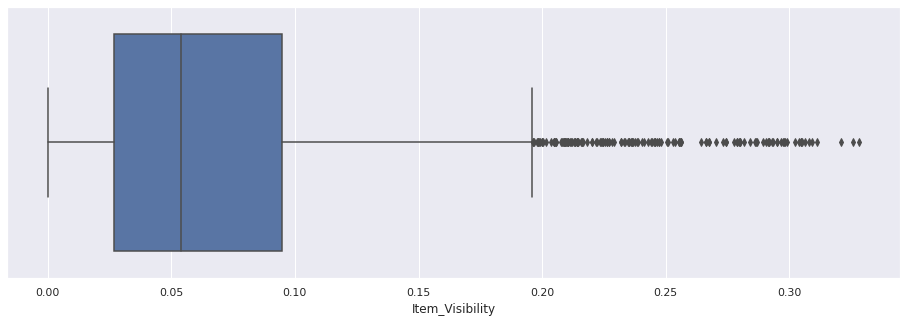

In [ ]:
sns.boxplot(df['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


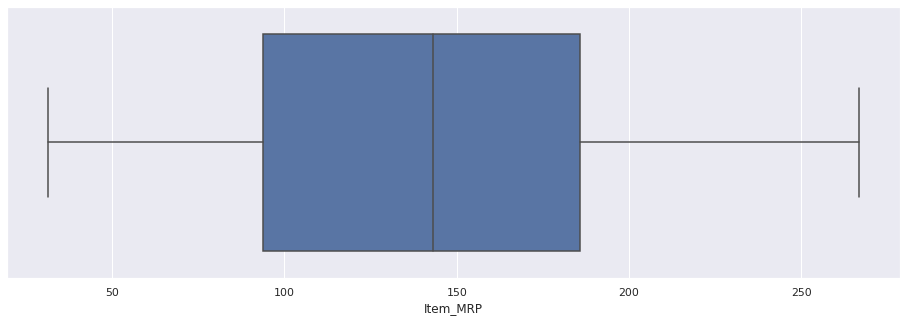

In [ ]:
sns.boxplot(df['Item_MRP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


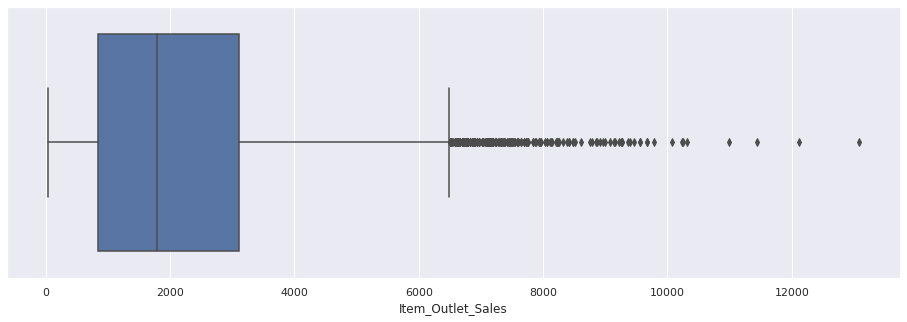

In [ ]:
sns.boxplot(df['Item_Outlet_Sales'])

In [ ]:
# outlier handling
def find_boundaries(df,variable):
  Q1 = df[variable].quantile(.25)
  Q3 = df[variable].quantile(.75)
  IQR = Q3-Q1
  lower_boundry = Q1 - 1.5*IQR
  upper_boundry = Q3 + 1.5*IQR
  return lower_boundry, upper_boundry

In [ ]:
l_item_visibility, u_item_visibility = find_boundaries(df,'Item_Visibility')
l_item_visibility, u_item_visibility

(-0.07440424500000001, 0.195979015)

In [ ]:
# df['Item_Visibility'] = np.where(df['Item_Visibility']>u_item_visibility,u_item_visibility, np.where(df['Item_Visibility']<l_item_visibility,l_item_visibility,df['Item_Visibility']))

In [ ]:
# sns.boxplot(df['Item_Visibility'])

In [ ]:
# sns.distplot(df['Item_Outlet_Sales'])

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [ ]:
# df.head(1)

In [ ]:
df = df.drop(columns=['Item_Identifier'])

In [ ]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,0,0.016047,2,249.8092,2,1999,0,0,0,3735.138


In [ ]:
#  df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1])

In [ ]:
#  df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])
#  df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])
#  df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7])
#  df.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8])
#  df.head()

In [ ]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Weight                  0.011550
Item_Type                   -0.015127
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.091442
Item_Visibility             -0.128625
Outlet_Type                 -0.209854
Outlet_Identifier           -0.389186
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.shape

(8523, 11)

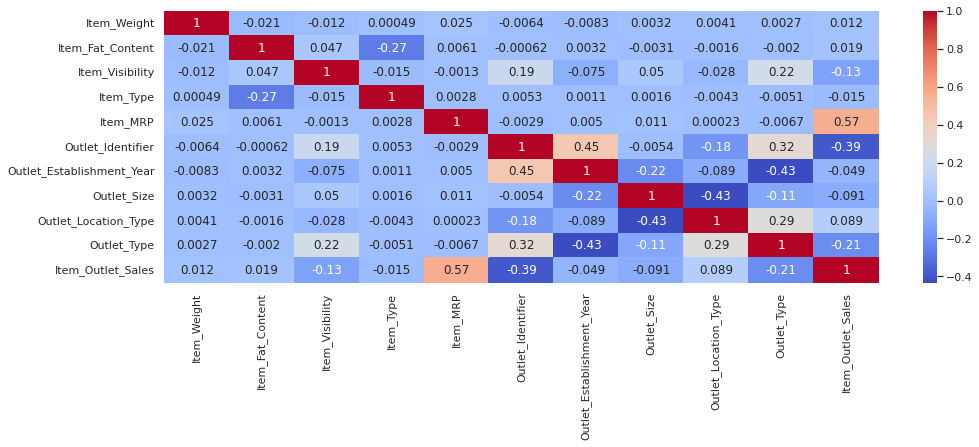

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,0,0.016047,2,249.8092,2,1999,0,0,0,3735.138


Training

In [ ]:
# X_train = df.drop('Item_Outlet_Sales',axis=1)
X_train = df[['Item_MRP','Outlet_Identifier','Item_Visibility','Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Item_Fat_Content']]
y_train = df['Item_Outlet_Sales']
X_train

,Item_MRP,Outlet_Identifier,Item_Visibility,Outlet_Type,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Item_Fat_Content
0,249.8092,2,0.016047,0,0,0,1999,0
1,48.2692,6,0.019278,1,0,2,2009,1
2,141.6180,2,0.016760,0,0,0,1999,0
3,182.0950,8,0.000000,3,0,2,1998,1
4,53.8614,1,0.000000,0,1,2,1987,0
...,...,...,...,...,...,...,...,...
8518,214.5218,1,0.056783,0,1,2,1987,0
8519,108.1570,5,0.046982,0,0,1,2002,1
8520,85.1224,3,0.035186,0,2,1,2004,0
8521,103.1332,6,0.145221,1,0,2,2009,1


In [ ]:
y_train = np.log(y_train)

In [ ]:
y_train

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Test data

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/BMtest.csv')
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
X_test.shape

(5681, 11)

In [ ]:
X_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_test.Item_Weight = X_test.Item_Weight.fillna(X_test.Item_Weight.mean())
X_test['Outlet_Size'].fillna(X_test['Outlet_Size'].mode()[0],inplace=True)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


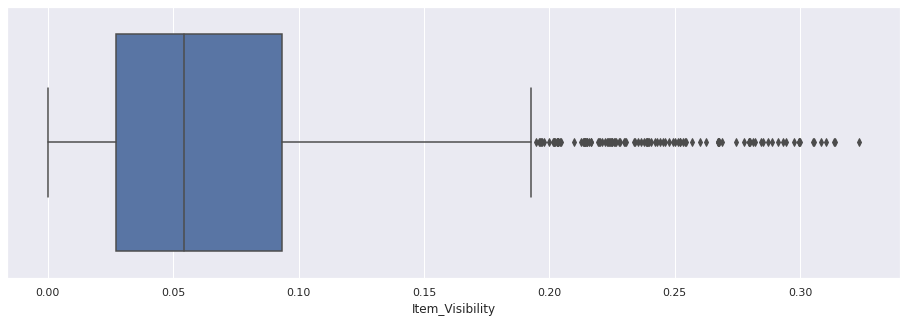

In [ ]:
sns.boxplot(X_test['Item_Visibility'])

In [ ]:
# l_item_visibility, u_item_visibility = find_boundaries(X_test,'Item_Visibility')
# X_test['Item_Visibility'] = np.where(X_test['Item_Visibility']>u_item_visibility,u_item_visibility, np.where(X_test['Item_Visibility']<l_item_visibility,l_item_visibility,X_test['Item_Visibility']))
# sns.boxplot(X_test['Item_Visibility'])

In [ ]:
X_test = X_test.replace(['Low Fat','low fat','LF'], 0)
X_test = X_test.replace(['Regular','reg'], 1)
X_test = X_test.replace(value.index, [0,0,1,0,2,0,0,1,2,0,0,2,1,0,0,0])
X_test = X_test.replace(outlet.index, [0,1,2,3,4,5,6,7,8,9])
X_test = X_test.replace(['Medium','High','Small'],[0,1,2])
X_test = X_test.replace(['Tier 1','Tier 2','Tier 3'],[0,1,2])
X_test = X_test.replace(['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'],[0,1,2,3])
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,0,107.8622,2,1999,0,0,0
1,FDW14,8.300000,1,0.038428,2,87.3198,7,2007,0,1,0
2,NCN55,14.600000,0,0.099575,1,241.7538,8,1998,0,2,3
3,FDQ58,7.315000,0,0.015388,0,155.0340,7,2007,0,1,0
4,FDY38,12.695633,1,0.118599,2,234.2300,0,1985,0,2,2


In [ ]:
X_test = X_test[['Item_MRP','Outlet_Identifier','Item_Visibility','Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year','Item_Fat_Content']]

In [ ]:
# X_test = X_test.drop('Item_Identifier',axis=1)
# X_test.head()

Predicting data

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([7.66873455, 6.76509752, 7.00437735, ..., 7.24098947, 7.84460506,
       6.91730375])

In [ ]:
for i in range(5681):
  if y_pred[i]<0:
    print (y_pred[i])

In [ ]:
y_pred

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([7.66873455, 6.76509752, 7.00437735, ..., 7.24098947, 7.84460506,
       6.91730375])

In [ ]:
y_pred  = (np.exp(y_pred))
y_pred

array([2140.37119919,  867.05075963, 1101.44403125, ..., 1395.47406913,
       2551.9296159 , 1009.59419825])

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [ ]:
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred
sample.isnull().sum()

Item_Identifier      0
Outlet_Identifier    0
Item_Outlet_Sales    0
dtype: int64

In [ ]:
sample.to_csv('0.1.csv', index = False)

Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.2.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2137.380722
1,FDW14,OUT017,866.221895
2,NCN55,OUT010,1101.844453
3,FDQ58,OUT017,1509.950364
4,FDY38,OUT027,4209.494041
...,...,...,...
5676,FDB58,OUT046,1549.396377
5677,FDD47,OUT018,1659.064015
5678,NCO17,OUT045,1396.041934
5679,FDJ26,OUT017,2546.485207


Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.3.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1263.522227
1,FDW14,OUT017,843.441388
2,NCN55,OUT010,2724.124842
3,FDQ58,OUT017,1455.557894
4,FDY38,OUT027,3754.194179
...,...,...,...
5676,FDB58,OUT046,1486.005292
5677,FDD47,OUT018,1724.751922
5678,NCO17,OUT045,1190.389956
5679,FDJ26,OUT017,2352.689829


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.4.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1822.2946
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,697.0926
3,FDQ58,OUT017,612.5360
4,FDY38,OUT027,6705.2718
...,...,...,...
5676,FDB58,OUT046,2936.1780
5677,FDD47,OUT018,1528.0110
5678,NCO17,OUT045,2316.9840
5679,FDJ26,OUT017,7247.2330


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.500.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1190.275404
1,FDW14,OUT017,1002.422468
2,NCN55,OUT010,481.348917
3,FDQ58,OUT017,1370.985088
4,FDY38,OUT027,5572.159571
...,...,...,...
5676,FDB58,OUT046,2048.394708
5677,FDD47,OUT018,2021.029328
5678,NCO17,OUT045,1453.744674
5679,FDJ26,OUT017,4364.987945


ExtremeTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.6.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1382.265368
1,FDW14,OUT017,1047.272778
2,NCN55,OUT010,459.480781
3,FDQ58,OUT017,1196.890567
4,FDY38,OUT027,5228.944089
...,...,...,...
5676,FDB58,OUT046,2029.110141
5677,FDD47,OUT018,2157.764724
5678,NCO17,OUT045,1831.794013
5679,FDJ26,OUT017,3994.595222


BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('0.7.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2119.581120
1,FDW14,OUT017,861.189143
2,NCN55,OUT010,1104.382438
3,FDQ58,OUT017,1496.402159
4,FDY38,OUT027,4248.802991
...,...,...,...
5676,FDB58,OUT046,1533.634804
5677,FDD47,OUT018,1682.028572
5678,NCO17,OUT045,1399.283266
5679,FDJ26,OUT017,2513.942491


XGBoost

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=150,learning_rate=0.1)
model.fit(X_train,y_train)

[19:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred  = np.exp(y_pred)

sample = pd.read_csv("/content/drive/MyDrive/BMtest.csv")
sample.drop([ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis="columns",inplace=True)
sample["Item_Outlet_Sales"] = y_pred

sample.to_csv('000.01.csv', index = False)
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1535.169678
1,FDW14,OUT017,1256.530762
2,NCN55,OUT010,502.205292
3,FDQ58,OUT017,2224.979248
4,FDY38,OUT027,5436.460938
...,...,...,...
5676,FDB58,OUT046,1945.858887
5677,FDD47,OUT018,2154.164062
5678,NCO17,OUT045,1619.778320
5679,FDJ26,OUT017,3218.871094


In [ ]:
# conclusion: xgboost gave the best prediction with n_estimator = 150 as for now